In [1]:

import os
import json
from PIL import Image
import pytesseract
import cv2 as cv
from tqdm import tqdm
import pytesseract
from IPython.display import Image


In [2]:
dt = "/Users/ivan/Desktop/ALL/Data/CVmchar"

In [3]:
! tesseract "/Users/ivan/Desktop/ALL/Data/CVmchar/mchar_train/000001.png" out digits
! cat out.txt

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 1044
23-


In [4]:
f1 = lambda x: "".join([str(i) for i in x])

def f2(p):
    pimg = cv.imread(p)
    
#     imgA = pimg.copy()
#     imgray = cv.cvtColor(imgA, cv.COLOR_BGR2GRAY)
    
#     ret, thresh = cv.threshold(imgray, 200, 255, cv.THRESH_BINARY)
#     contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
#     imgA[:] = 255
#     pimg = cv.drawContours(imgA, contours, -1, (0,0,255), 1)
#     pimg = cv.imread(p)
    
    return pimg, pytesseract.image_to_string(pimg, config="-c tessedit_char_whitelist=1234567890")


23


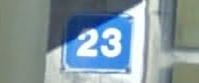

In [5]:
p = "/Users/ivan/Desktop/ALL/Data/CVmchar/mchar_train/000001.png"
img, content = f2(p)
cv.imwrite("tmp.jpg",img)
print(content)
Image(filename="tmp.jpg", width=300, height=300)


In [6]:
p = "/Users/ivan/Desktop/ALL/Data/CVmchar/mchar_train/000007.png"
img, content = f2(p)
cv.imwrite("tmp.jpg",img)
print(content)
Image(filename="tmp.jpg", width=300, height=300)

In [7]:
with open(f"{dt}/mchar_train.json", "r") as f:
    data = f.readlines()
json_file = data[0]
j_obj = json.loads(json_file)

n1, n2 = 0, 0
for dti in tqdm(os.listdir(f"{dt}/mchar_train")[:100]):
    n1 += 1 if f1(j_obj[dti]["label"]) == f2(f"{dt}/mchar_train/{dti}")[1] else 0
    n2 += 1
n1, n2, n1/n2


100%|██████████| 100/100 [00:14<00:00,  6.80it/s]


(5, 100, 0.05)

In [8]:
with open(f"{dt}/mchar_val.json", "r") as f:
    data = f.readlines()
json_file = data[0]
j_obj = json.loads(json_file)

n1, n2 = 0, 0
for dti in tqdm(os.listdir(f"{dt}/mchar_val")[:100]):
    n1 += 1 if f1(j_obj[dti]["label"]) == f2(f"{dt}/mchar_train/{dti}")[1] else 0
    n2 += 1
n1, n2, n1/n2


100%|██████████| 100/100 [00:14<00:00,  6.81it/s]


(1, 100, 0.01)